In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/customer_data.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


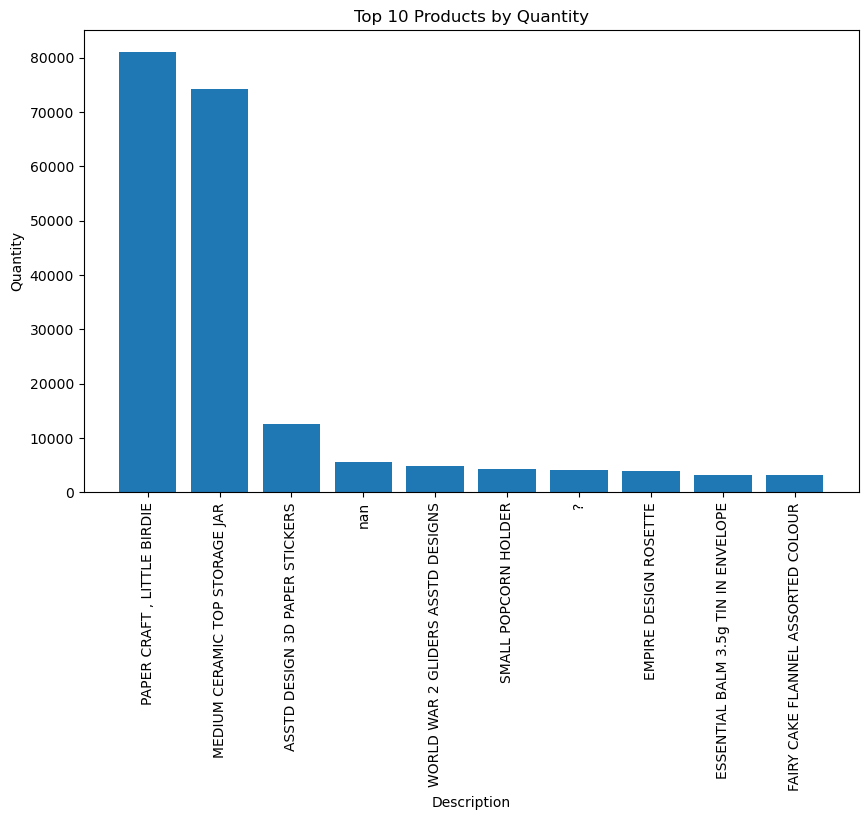

In [9]:
df['Description'] = df['Description'].astype(str)
top_10_products = df.sort_values(by='Quantity', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['Description'], top_10_products['Quantity'])
plt.xticks(rotation=90)
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.title('Top 10 Products by Quantity')
plt.show()

In [4]:
df.shape

(541909, 8)

In [101]:
df['CustomerID'] = df['CustomerID'].astype('object')

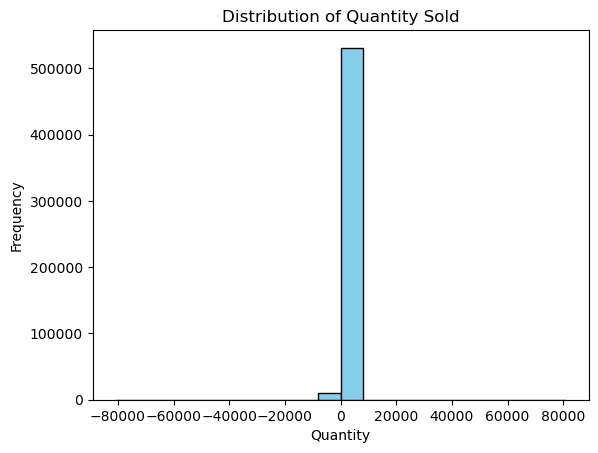

In [10]:
plt.hist(df['Quantity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

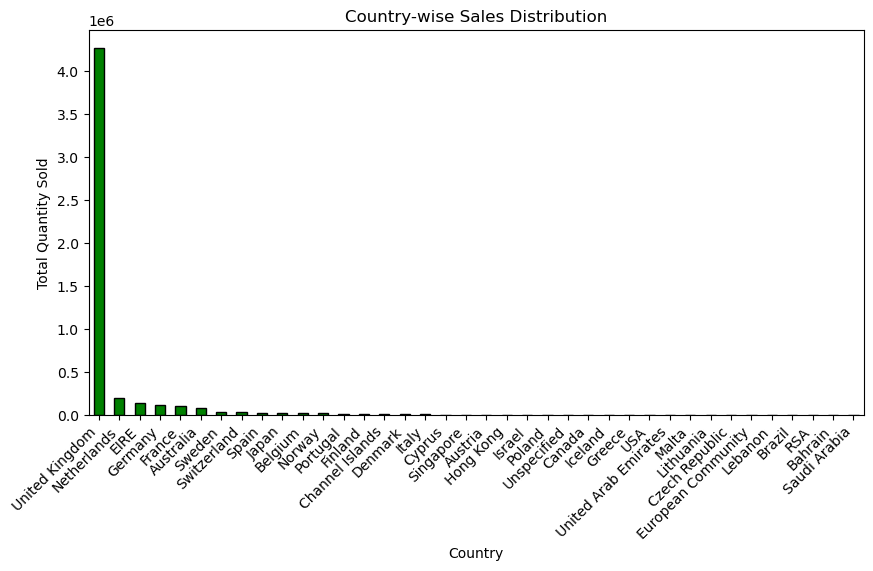

In [12]:
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
country_sales.plot(kind='bar', color='green', edgecolor='black')
plt.title('Country-wise Sales Distribution')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [103]:
#Description/summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


In [104]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
CustomerID,406829.0,4372.0,17841.0,7983.0
Country,541909,38,United Kingdom,495478


In [105]:
missing_vals = df.isnull().sum()
print(missing_vals)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [5]:
#checking if all the rows with null values are removed
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
print(df.duplicated().sum())

5225


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape[0] #remaining rows

401604

In [111]:
df['UnitPrice'].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [112]:
print((df['UnitPrice']==0).sum())

40


In [113]:
print((df['Quantity']==0).sum())

0


In [9]:
#removing rows with unit price = 0 as they may be free or entry errors and not required
df = df[df['UnitPrice'] > 0]

In [10]:
#resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df.shape[0]

401564

In [118]:
#Creating dataframe for comparing customers

In [13]:
#recency
#calculation for checking how recently a customer made a transaction.
#creating a new dataframe
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDay'] = df['InvoiceDate'].dt.date
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()
most_recent_date = df['InvoiceDay'].max()
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [14]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [15]:
#frequency
#number of transactions made by each customer
total_trans = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_trans.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

#number of products purchased by each customer
total_prod = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_prod.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

#new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_trans, on='CustomerID')
customer_data = pd.merge(customer_data, total_prod, on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2341
3,12349.0,18,1,631
4,12350.0,310,1,197


In [16]:
#monetary
#total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

#average transaction value for each customer
avg_trans = total_spend.merge(total_trans, on='CustomerID')
avg_trans['Average_Transaction_Value'] = avg_trans['Total_Spend'] / avg_trans['Total_Transactions']

#new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, avg_trans[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2341,1797.24,449.310000
3,12349.0,18,1,631,1757.55,1757.550000
4,12350.0,310,1,197,334.40,334.400000


In [17]:
#diversity of products
#number of unique products purchased by each customer
uniq_prod = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
uniq_prod.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

customer_data = pd.merge(customer_data, uniq_prod, on='CustomerID')
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2341,1797.24,449.310000,22
3,12349.0,18,1,631,1757.55,1757.550000,73
4,12350.0,310,1,197,334.40,334.400000,17


In [18]:
#average number of days between consecutive purchases
days_btw = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
avg_days_btw = days_btw.groupby('CustomerID').mean().reset_index()
avg_days_btw.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

customer_data = pd.merge(customer_data, avg_days_btw, on='CustomerID')
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases
0,12346.0,325,2,0,0.00,0.000000,1,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000
4,12350.0,310,1,197,334.40,334.400000,17,0.000000


In [19]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

In [20]:
#cancellation
#number of cancelled transactions for each customer
c_trans = df[df['Transaction_Status'] == 'Cancelled']
c_freq = c_trans.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
c_freq.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

customer_data = pd.merge(customer_data, c_freq, on='CustomerID', how='left')

#for customers who have not cancelled any transaction
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

#rate of cancellation
total_trans = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_trans['InvoiceNo']

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,0.0,0.0
2,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,0.0,0.0
3,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0.0,0.0
4,12350.0,310,1,197,334.40,334.400000,17,0.000000,0.0,0.0


In [21]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4293 non-null   float64
 1   Days_Since_Last_Purchase        4293 non-null   int64  
 2   Total_Transactions              4293 non-null   int64  
 3   Total_Products_Purchased        4293 non-null   int64  
 4   Total_Spend                     4293 non-null   float64
 5   Average_Transaction_Value       4293 non-null   float64
 6   Unique_Products_Purchased       4293 non-null   int64  
 7   Average_Days_Between_Purchases  4293 non-null   float64
 8   Cancellation_Frequency          4293 non-null   float64
 9   Cancellation_Rate               4293 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 335.5 KB


In [22]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype('object')

In [23]:
same_val_cols = [col for col in df.columns if df[col].nunique() == 1]
print(len(same_val_cols))
print(same_val_cols)

0
[]


In [24]:
customer_data.nunique()

CustomerID                        4293
Days_Since_Last_Purchase           304
Total_Transactions                  64
Total_Products_Purchased          1763
Total_Spend                       4233
Average_Transaction_Value         4237
Unique_Products_Purchased          342
Average_Days_Between_Purchases    2591
Cancellation_Frequency              27
Cancellation_Rate                  127
dtype: int64

In [25]:
unique_value_vars = []
r = len(customer_data)
c = customer_data.columns
for col in c:
    if customer_data[col].nunique() == r:
        unique_value_vars.append(col)
print(unique_value_vars) #customer id is a required column so we do not change anything

['CustomerID']


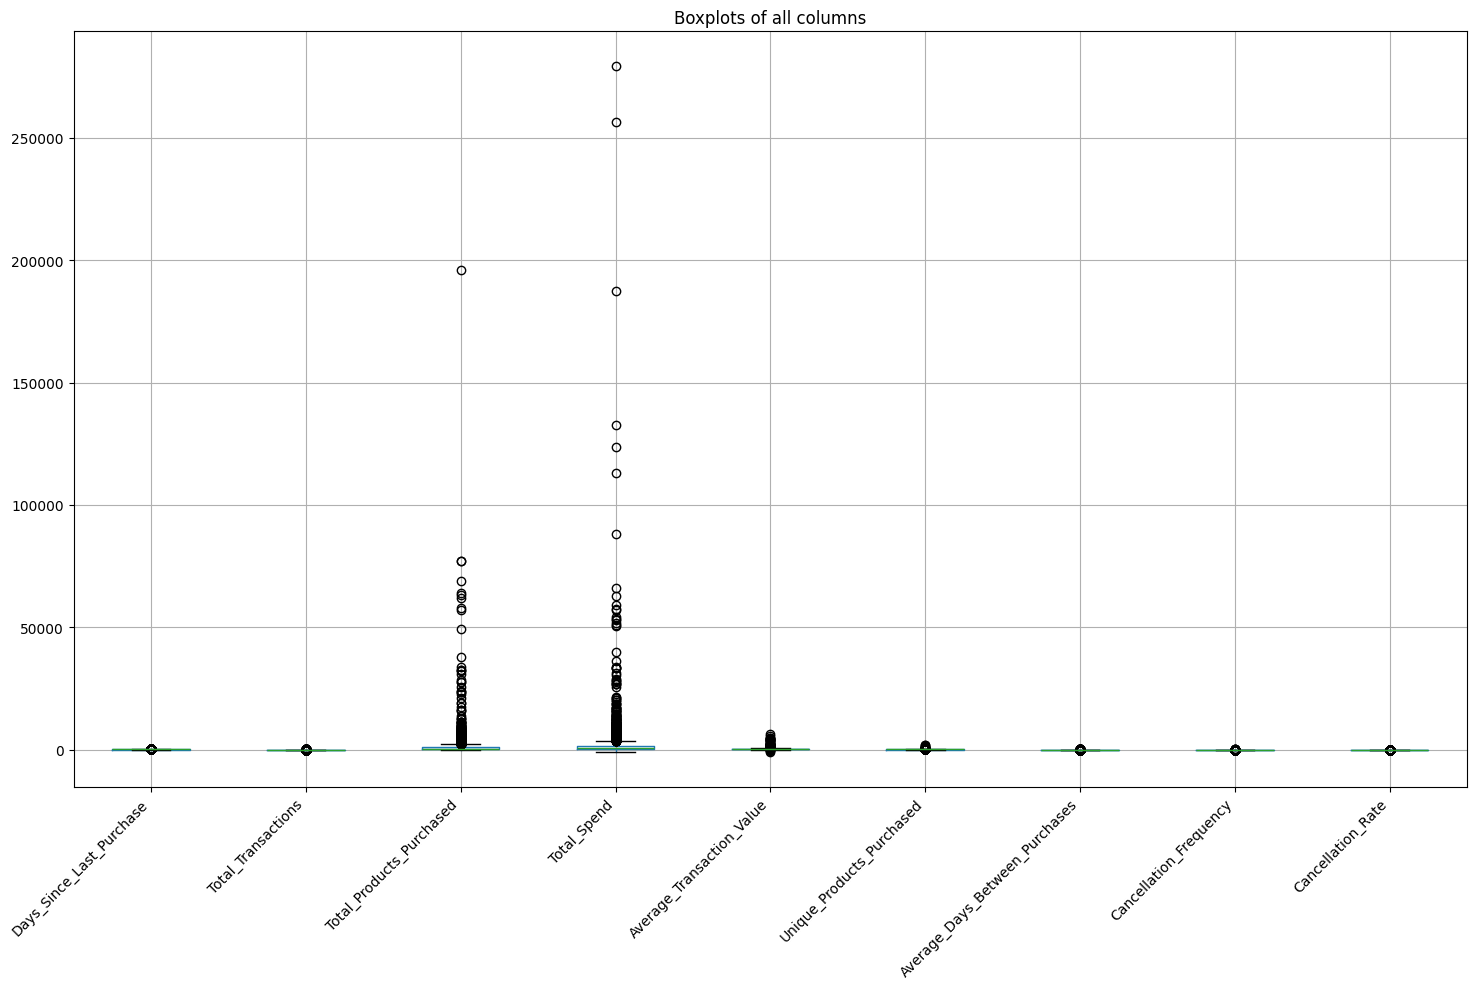

In [26]:
plt.figure(figsize=(15,10))
customer_data.boxplot()
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots of all columns')
plt.tight_layout()
plt.show()

In [27]:
def handle_outliers(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
            df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

customer_data = handle_outliers(customer_data)

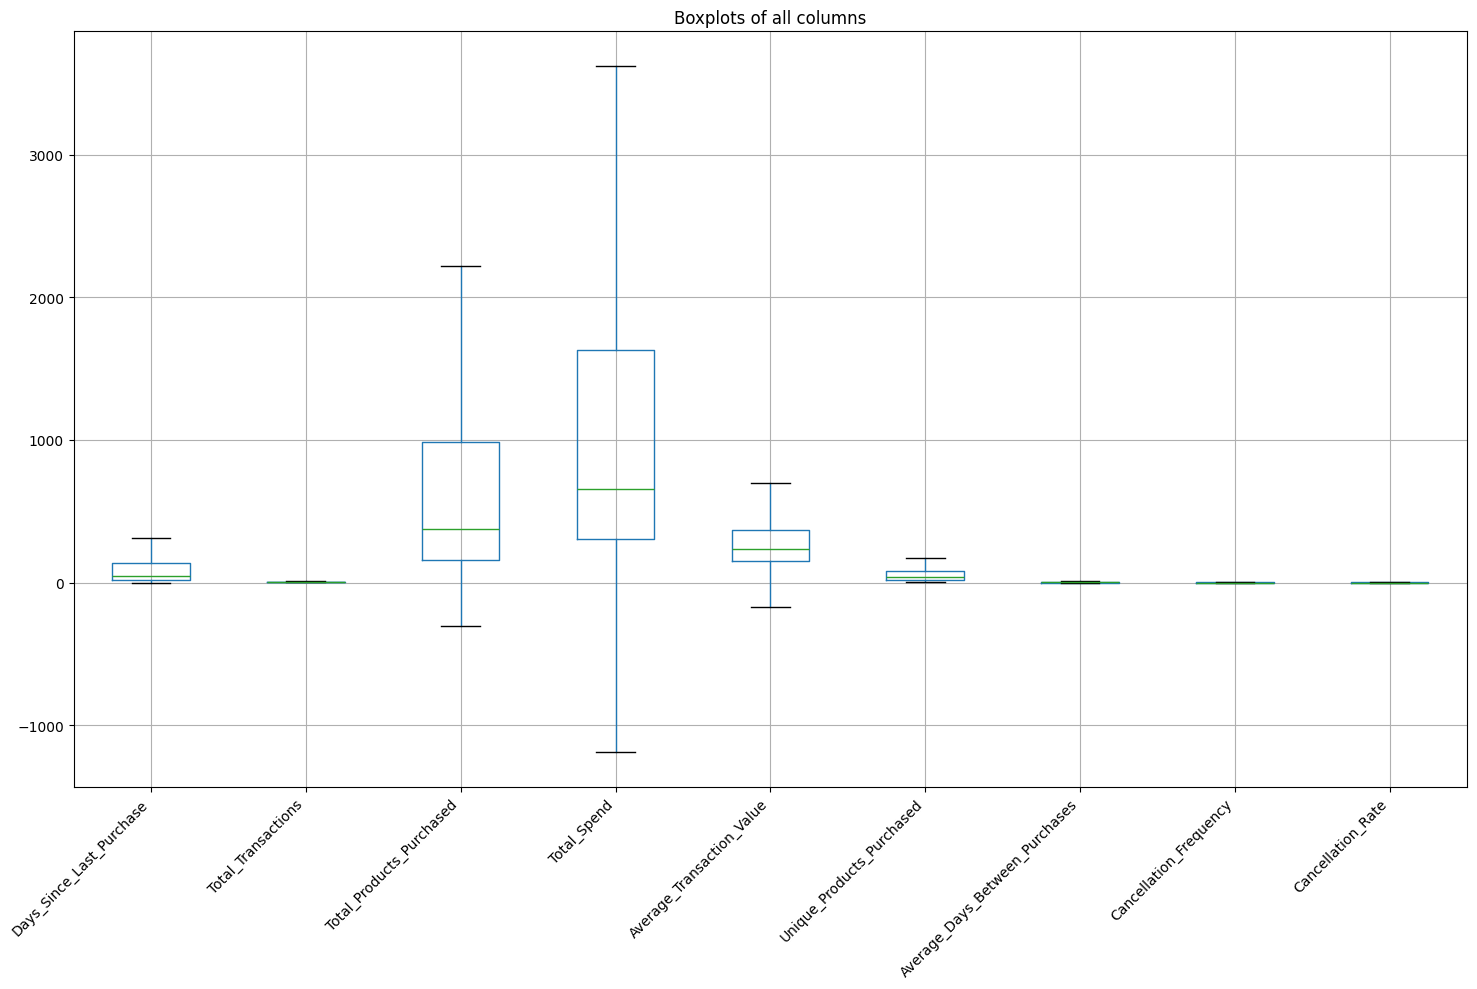

In [28]:
plt.figure(figsize=(15,10))
customer_data.boxplot()
plt.xticks(rotation=45, ha='right')
plt.title('Boxplots of all columns')
plt.tight_layout()
plt.show()

In [29]:
print(customer_data.corr())

                                CustomerID  Days_Since_Last_Purchase  \
CustomerID                        1.000000                  0.006960   
Days_Since_Last_Purchase          0.006960                  1.000000   
Total_Transactions               -0.011584                 -0.432593   
Total_Products_Purchased         -0.064781                 -0.408332   
Total_Spend                      -0.081623                 -0.406641   
Average_Transaction_Value        -0.130987                 -0.108717   
Unique_Products_Purchased         0.000185                 -0.392029   
Average_Days_Between_Purchases   -0.001431                 -0.233699   
Cancellation_Frequency           -0.054740                 -0.249712   
Cancellation_Rate                -0.021256                 -0.194537   

                                Total_Transactions  Total_Products_Purchased  \
CustomerID                               -0.011584                 -0.064781   
Days_Since_Last_Purchase                 -0.432

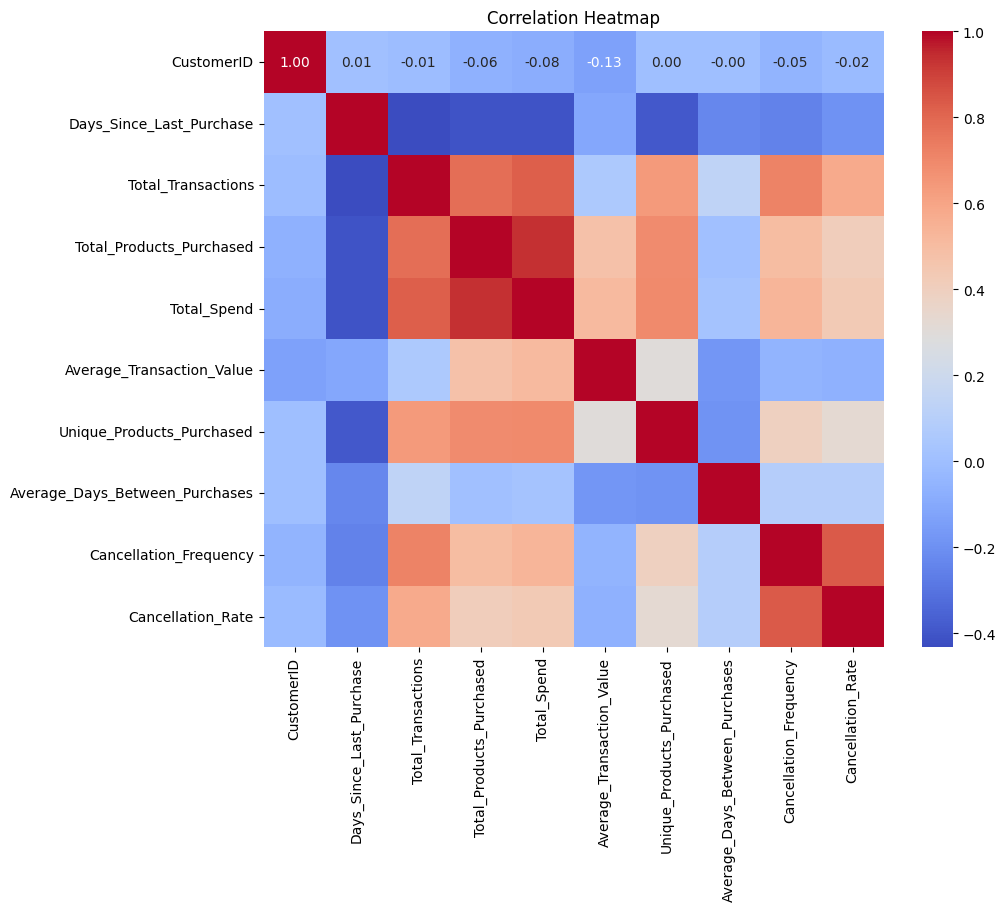

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [31]:
'''from correlation heatmap and correlation map, we observe 'total spend' and 'total products purchased', 'cancellation rate' and 'cancellation frequency',
'total spend' and 'total transactions' have correlation >0.8, so we can remove 'total products purchased' and 'total transactions' '''
customer_data.drop(columns=['Total_Transactions','Total_Products_Purchased','Cancellation_Rate'], inplace=True)

In [32]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4293 non-null   object 
 1   Days_Since_Last_Purchase        4293 non-null   float64
 2   Total_Spend                     4293 non-null   float64
 3   Average_Transaction_Value       4293 non-null   float64
 4   Unique_Products_Purchased       4293 non-null   float64
 5   Average_Days_Between_Purchases  4293 non-null   float64
 6   Cancellation_Frequency          4293 non-null   float64
dtypes: float64(6), object(1)
memory usage: 234.9+ KB


In [33]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype('float64')

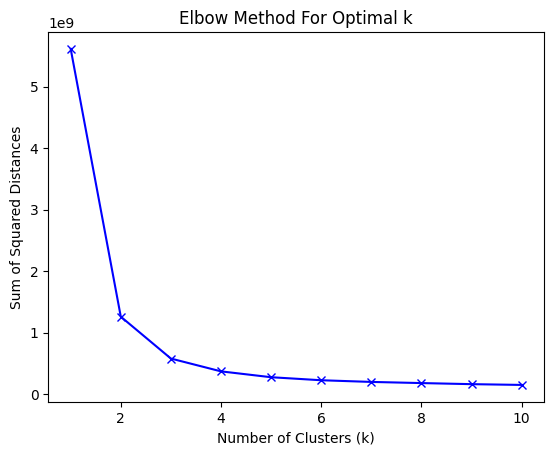

In [34]:
X = customer_data.drop('CustomerID', axis=1)
ssd = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')

plt.show()

In [141]:
#the curve starts to flatten from k = 3

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data.drop('CustomerID', axis=1))

In [36]:
customer_data['Cluster'] = customer_data['Cluster'].astype('object')
customer_data['Cluster'].describe()

count     4293
unique       3
top          1
freq      2618
Name: Cluster, dtype: int64

In [37]:
cluster_counts = customer_data['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    2618
0     977
2     698
Name: count, dtype: int64


In [38]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, customer_data['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6057685505968793


In [39]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Cancellation_Frequency,Cluster
0,12346.0,313.5,0.000,0.000000,1.0,0.000000,1.0,1
1,12347.0,2.0,3624.725,615.714286,103.0,2.016575,0.0,2
2,12348.0,75.0,1797.240,449.310000,22.0,7.801724,0.0,0
3,12349.0,18.0,1757.550,695.050455,73.0,0.000000,0.0,0
4,12350.0,310.0,334.400,334.400000,17.0,0.000000,0.0,1


In [40]:
#Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df.merge(customer_data[['CustomerID', 'Cluster']], on='CustomerID', how='inner')

#Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['Cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['Cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('Cluster').head(10)

#Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'Cluster', 'StockCode'])['Quantity'].sum().reset_index()

#Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['Cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['Cluster'] == cluster]
    customers_in_cluster = customer_data[customer_data['Cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['Cluster'] == cluster)]['StockCode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

#Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'Cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data.merge(recommendations_df, on=['CustomerID', 'Cluster'], how='right')


In [41]:
recommendations_df = customer_data_with_recommendations.drop(columns = ['Days_Since_Last_Purchase','Total_Spend','Average_Transaction_Value','Unique_Products_Purchased','Average_Days_Between_Purchases','Cancellation_Frequency'])	

In [42]:
recommendations_df.head()

,CustomerID,Cluster,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
0,12348.0,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85099B,JUMBO BAG RED RETROSPOT
1,12349.0,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85099B,JUMBO BAG RED RETROSPOT
2,12352.0,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85099B,JUMBO BAG RED RETROSPOT
3,12354.0,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85099B,JUMBO BAG RED RETROSPOT
4,12358.0,0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85099B,JUMBO BAG RED RETROSPOT


In [43]:
recommendations_df.shape

(4293, 8)